# 7. Matplotlib Plotting
---
> *Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.*

**Content:**
- [Simple Lines](#Simple-Lines)
- [Error Bars](#Error-Bars)
- [Legends & Labels](#Legends-&-Labels)
- [Histograms](#Histograms)
- [Subplots](#Subplots)
- [3D Plots / Colormaps](#3D-Plots-/-Colormaps)
- [Saving Figures](#Saving-Figures)

see also:
- https://nbviewer.jupyter.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-4-Matplotlib.ipynb
- https://matplotlib.org/stable/tutorials/index.html
- https://matplotlib.org/stable/gallery/index.html <font color=red>(start here for inspiration)</font>
- https://matplotlib.org/stable/gallery/showcase/xkcd.html

## Simple Lines
---

First we create some test data using Numpy arrays:

In [ ]:
import numpy as np

x = np.linspace(0, 10, 120)
y = x**2.0

And now we plot it using `matplotlib`:

In [ ]:
import matplotlib.pylab as plt

plt.figure(1)

plt.plot( x, y )

plt.show()

### Line Styles & Viewing Modes

In [ ]:
plt.figure(1)

# as blue lines
#plt.plot(x, y,  color='tab:blue', linestyle='-')

# ... or shorter
#plt.plot(x, y, '-b')

# as red dots
plt.plot(x, y, 'r.')

plt.show()

## Error Bars
---

In [ ]:
# load data including errors
x, y, errors = np.loadtxt('./data/03_xyerr.dat').transpose()

plt.figure(1)

plt.errorbar(x, y, errors, fmt='ro') # Note: Here we need to use "fmt = ..."

plt.plot(x, y, 'b-')

plt.show()

## Legends & Labels
---

In [ ]:
# generate some data
x  = np.linspace(0, 5, 100)
y2 = x**2.0
y3 = x**3.0

# plot data
plt.figure(1)

#plt.plot(x, y2, color='b', label="y = x**2")
#plt.plot(x, y3, color='k', label="y = x**3")

plt.plot(x, y2, color='b', label="$y = x^2$")
plt.plot(x, y3, color='k', label="$y = x^3$")

# add legend
plt.legend(fontsize=18, loc=2)

#plt.legend(loc=2, fontsize=18)

# and x/y labels
plt.xlabel('x lab')
plt.ylabel('y lab', fontsize=18)

# don't forget about the title
plt.title('title', fontsize=20)

plt.show()

## Histograms
---

In [ ]:
# load some data
myCol1, myCol2 = np.genfromtxt('./data/01_xy.dat').transpose()

plt.figure(1)

# let's get some idea of our data by plotting a simple histogram
plt.hist(myCol1, label='col 1', alpha=0.5)

plt.hist(myCol2, label='col 2', alpha=0.5)

plt.legend()

plt.show()

### Example: Velocity of light as measured by Michelson

Michelson:
- first American to win a Nobel prize (1907)
- disprove the existence of aether
- measurement of speed of light:

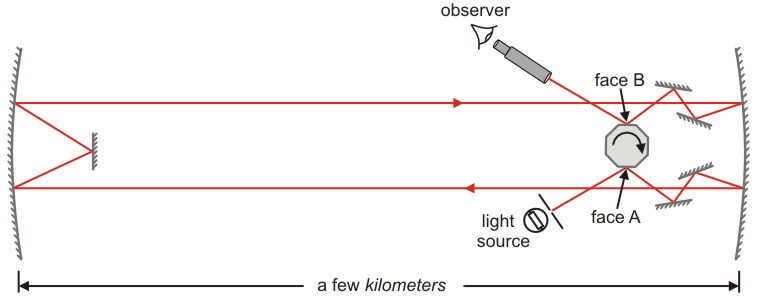

https://www.saburchill.com/physics/chapters3/0007.html

- the time ($t$) taken for the light to cover the distance $s$:
$$ t = \frac{1}{8n} $$
- speed of light $c$:
$$ c = \frac{s}{t} = 8 n s $$

In [ ]:
# load data
dataMichelson = np.genfromtxt('./data/02_michelson.dat', skip_header=1)

In [ ]:
# plot data
plt.figure(1)

plt.hist(dataMichelson, bins=15)

plt.xlabel('$v - 299.000$ (km/s)')
plt.ylabel('N')

plt.show()

In [ ]:
# plot data
plt.figure(1)

# get some statistical data
median  = np.median(dataMichelson)
average = np.average(dataMichelson)

plt.hist(dataMichelson, bins=15, label='Michelson ')
plt.plot([792.458, 792.458], [0., 18.], label='SI')

plt.plot([median, median], [0., 18.], label='median')
plt.plot([average, average], [0., 18.], label='average')

plt.xlabel('$v - 299.000$ (km/s)')
plt.ylabel('N')

plt.legend()

plt.show()

print(average, median)

## Subplots
---

In [ ]:
# create some data first
x1 = np.linspace(0.0, 5.0, 100)
y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)

x2 = np.linspace(0.0, 2.0, 100)
y2 = np.cos(2 * np.pi * x2)

### Simple version via `subplot()`:

In [ ]:
plt.figure(1)

# use subplot #1 out of a 1x2 grid

plt.subplot(2, 2, 1)

plt.plot(x1, y1)

# use subplot #2 out of a 1x2 grid
plt.subplot(2, 2, 4)

plt.plot(x2, y2)

plt.show()

### Sophisticated version via `GridSpec()`:

In [ ]:
plt.figure(1)

# create a 2x1 axis grid
grid = plt.GridSpec(nrows=1, ncols=2)

# use first axis
plt.subplot( grid[0] )
plt.plot(x1, y1)

# uses second axis
plt.subplot( grid[1] )
plt.plot(x2, y2)

plt.show()

In [ ]:
plt.figure(1)

# create a 2x3 axis grid
grid = plt.GridSpec(nrows=2, ncols=3)

# use complete first grid row
plt.subplot( grid[0, 0:3] )
plt.plot(x1, y1)

# use first position in second row
plt.subplot(grid[1, 0])
plt.plot(x2, y2)

# use second position in second row
plt.subplot(grid[1, 1])
plt.plot(x2, -y2)

# use third position in second row
plt.subplot(grid[1, 2])
plt.plot(x2, y2**2.0)

plt.show()

## 3D Plots / Colormaps
---

### self-defined z(x,y) data:

In [ ]:
import matplotlib.pylab as plt

# define x and y ranges
x = np.linspace(0, 2, 100)
y = np.linspace(0, 3, 120)

# create a x/y meshgrid
xGrid, yGrid = np.meshgrid(x, y)

# calculate some z(x,y) data from the meshgrid
z = xGrid**2 + yGrid**2

# plot it as a colormap
plt.figure(1)

plt.pcolor(x, y, z, cmap='RdBu', vmin=z.min(), vmax=z.max())

plt.colorbar()

plt.show()

In [ ]:
# use 3D axis
from mpl_toolkits.mplot3d import axes3d, Axes3D

# define some z(x,y) data
def f(x, y):
    return np.sin(np.sqrt(x**2 + y**2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

xGrid, yGrid = np.meshgrid(x, y)
z = f(xGrid, yGrid)

# plot it in 3D projection
plt.figure(1)

ax = plt.axes(projection='3d')

ax.contour3D(xGrid, yGrid, z,    # Note: here we need to use xGrid & yGrid !!!
             levels=40, 
             cmap='Reds')

plt.show()

### plot z(x,y) from xyz files using interpolation:

In [ ]:
# we use Scipy's griddata function to interpolate 3D datafrom scipy.interpolate import griddata
from scipy.interpolate import griddata

# load xyz data
x, y, z = np.genfromtxt('./data/04_xyz.dat', unpack=True)

# define new x/y grids including corresponding meshgrid
xNew = np.linspace(-6, 6, 100)
yNew = np.linspace(-6, 6, 100)
xGrid, yGrid = np.meshgrid(xNew, yNew)

# and interpolate raw z(x,y) to zNew(xNew,yNew)
zNew = griddata((x, y), z,  (xGrid, yGrid),  method='nearest')

# plot color map
plt.figure(1)

plt.contourf(xGrid, yGrid, zNew, levels=100, cmap='seismic')

#plt.axis('equal')

plt.show()

## Saving Figures
---

In [ ]:
# define some z(x,y) data
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

xGrid, yGrid = np.meshgrid(x, y)
z = f(xGrid, yGrid)

# plot it in 3D projection
plt.figure(1)

plt.contourf(xGrid, yGrid, z, levels=100, cmap="Reds")

# save as *.png
plt.savefig('./data/test/02_colormap.png', dpi=60)

In [ ]:
plt.figure(1)

x  = np.linspace(0, 5, 100)
plt.plot(x, x**2.0, color = 'b', label = "$y = x^2$")
plt.plot(x, x**3.0, color = 'k', label = "$y = x^3$")

plt.legend( loc = 2, fontsize = 12 )

plt.savefig('./data/test/03_1D.pdf')